<a href="https://colab.research.google.com/github/Aadityasindhuu/Aadityasindhuu/blob/main/4TH_ANN_MODEL(Earlystopping_and_dropouts).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.callbacks import EarlyStopping




# Load the CSV dataset
from google.colab import files
uploaded = files.upload()

dataset = pd.read_csv("diabetes2.0.csv")




Saving diabetes2.0.csv to diabetes2.0.csv


In [ ]:
X = dataset.drop(columns=['Insulin'])
y = dataset['SkinThickness']


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [ ]:
model = keras.Sequential([
    layers.Dense(256, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    layers.Dropout(0.2),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.2),
    layers.Dense(1, activation='sigmoid')
])



In [ ]:
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])


In [ ]:
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)


In [ ]:
history = model.fit(X_train_scaled, y_train, epochs=55, batch_size=60, validation_split=0.2, callbacks=[early_stopping])


Epoch 1/55
9/9 [==============================] - 1s 50ms/step - loss: -8.1381 - accuracy: 0.0692 - val_loss: -29.7746 - val_accuracy: 0.0000e+00
Epoch 2/55
9/9 [==============================] - 0s 12ms/step - loss: -43.3303 - accuracy: 0.0000e+00 - val_loss: -72.0681 - val_accuracy: 0.0000e+00
Epoch 3/55
9/9 [==============================] - 0s 13ms/step - loss: -90.6830 - accuracy: 0.0000e+00 - val_loss: -135.8189 - val_accuracy: 0.0000e+00
Epoch 4/55
9/9 [==============================] - 0s 14ms/step - loss: -164.2320 - accuracy: 0.0000e+00 - val_loss: -231.4488 - val_accuracy: 0.0000e+00
Epoch 5/55
9/9 [==============================] - 0s 12ms/step - loss: -272.9750 - accuracy: 0.0000e+00 - val_loss: -374.9272 - val_accuracy: 0.0000e+00
Epoch 6/55
9/9 [==============================] - 0s 11ms/step - loss: -427.3591 - accuracy: 0.0000e+00 - val_loss: -577.0887 - val_accuracy: 0.0000e+00
Epoch 7/55
9/9 [==============================] - 0s 12ms/step - loss: -656.3565 - accuracy:

In [ ]:
test_loss, test_acc = model.evaluate(X_test_scaled, y_test)
print(f'Test accuracy: {test_acc:.4f}')


5/5 [==============================] - 0s 3ms/step - loss: -658291.8750 - accuracy: 0.0000e+00
Test accuracy: 0.0000


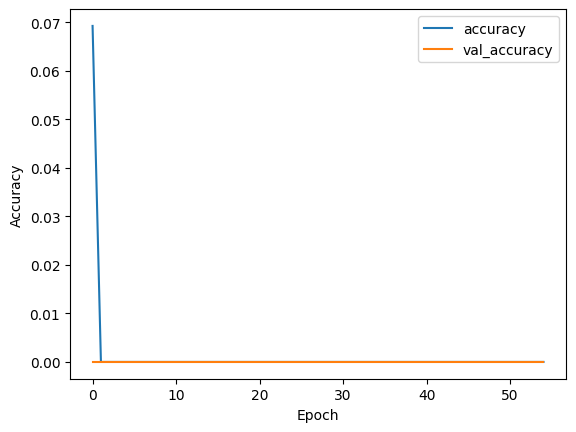

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()
